In [1]:
%load_ext autoreload
%autoreload 2

# Does weighting the Loss Help?

In [2]:
import autorootcwd
import os
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Testing Alphas

In [4]:
DIR = './results/weight_alpha_search'
files = os.listdir(DIR)
rows = []
for f in files:
    alpha = f.split('_')[1]
    with open(f"{DIR}/{f}/val_metrics.json") as f:
        data = json.load(f)
        rows.append({
            'alpha': alpha,
            'accuracy': data['mean']['acc'],
            'root': data['mean']['root'],
            'majmin': data['mean']['majmin'],
            'third': data['mean']['third'],
            'seventh': data['mean']['seventh'],
            'mirex': data['mean']['mirex'],
            'mean_acc_class': data['class_wise']['acc']['mean'],
            'median_acc_class': data['class_wise']['acc']['median'],
            'avg_transitions': data['avg_transitions_per_song']
        })
 

df = pd.DataFrame(rows)
# Round this clumn to 2 decimal places
# df['alpha'] = df['alpha'].astype(float)
# df['accuracy'] = df['accuracy'].round(2)
df.sort_values('alpha', ascending=True, inplace=True)

In [5]:
df

,alpha,accuracy,root,majmin,third,seventh,mirex,mean_acc_class,median_acc_class,avg_transitions
6,0,59.997804,78.074613,75.757682,75.025326,62.257793,79.132400,19.094157,0.000000,99.611570
4,0.1,59.975243,77.832714,75.557592,74.876843,62.175839,79.337285,20.580541,3.409628,100.334711
9,0.2,60.371415,78.905591,76.444543,75.812278,62.501761,78.572185,22.748008,7.585539,104.115702
8,0.3,60.312525,79.022942,76.619768,76.065891,62.378618,78.531504,23.708879,9.528198,106.933884
7,0.4,59.549772,79.118289,76.473135,76.068110,61.539467,78.047260,25.070738,15.144164,111.528926
10,0.5,58.342283,78.810621,75.669500,75.525016,60.177514,77.614974,27.328276,20.641201,116.756198
3,0.6,56.851045,78.499253,74.979917,75.151201,58.580480,76.907399,28.726471,25.916826,120.913223
0,0.7,54.253750,77.889590,73.627112,74.287947,55.909069,75.975568,29.173881,29.373962,125.363636
2,0.8,53.399109,77.190361,73.082264,73.983694,55.017726,76.063045,29.574568,32.081181,126.747934
1,0.9,49.519021,76.513912,71.221607,72.966059,50.839740,74.563541,31.732657,35.500475,135.743802


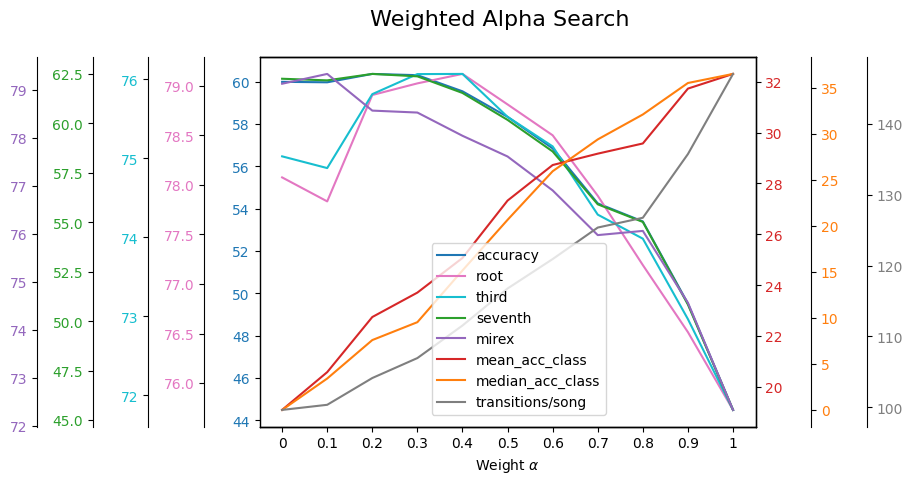

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel(r'Weight $\alpha$')
# ax1.set_xticks(np.linspace(0, 1, 11))

ax1.plot(df['alpha'], df['accuracy'], color=color)
# Remove y-axis ticks
ax1.tick_params(axis='y', labelcolor=color)
# ax1.tick_params(axis='x', rotation=45)

# Also plot root
ax6 = ax1.twinx()
color = 'tab:pink'
ax6.plot(df['alpha'], df['root'], color=color)
ax6.tick_params(axis='y', labelcolor=color)
ax6.yaxis.tick_left()
ax6.spines['left'].set_position(('outward', 40))

# Third
ax7 = ax1.twinx()
color = 'tab:cyan'
ax7.plot(df['alpha'], df['third'], color=color)
ax7.tick_params(axis='y', labelcolor=color)
ax7.yaxis.tick_left()
ax7.spines['left'].set_position(('outward', 80))

# Also plot sevenths
ax3 = ax1.twinx()
color = 'tab:green'
ax3.plot(df['alpha'], df['seventh'], color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.yaxis.tick_left()
ax3.spines['left'].set_position(('outward', 120))

# Also plot mirex
ax5 = ax1.twinx()
color = 'tab:purple'
ax5.plot(df['alpha'], df['mirex'], color=color)
ax5.tick_params(axis='y', labelcolor=color)
ax5.yaxis.tick_left()
ax5.spines['left'].set_position(('outward', 160))

# Now on the right
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(df['alpha'], df['mean_acc_class'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.tick_right()

# Also plot class_wise_acc_median
ax4 = ax1.twinx()
color = 'tab:orange'
ax4.plot(df['alpha'], df['median_acc_class'], color=color)
ax4.tick_params(axis='y', labelcolor=color)
ax4.yaxis.tick_right()
ax4.spines['right'].set_position(('outward', 40))

# Avg transitions
ax8 = ax1.twinx()
color = 'tab:gray'
ax8.plot(df['alpha'], df['avg_transitions'], color=color)
ax8.tick_params(axis='y', labelcolor=color)
ax8.yaxis.tick_right()
ax8.spines['right'].set_position(('outward', 80))


# Legend combined for all axes
fig.legend(['accuracy', 'root', 'third', 'seventh', 'mirex', 'mean_acc_class', 'median_acc_class', 'transitions/song'], loc='lower center', bbox_to_anchor=(0.53, 0.12))
fig.suptitle('Weighted Alpha Search', fontsize=16)

plt.savefig('./thesis/figures/weight_alpha_search.png', bbox_inches='tight')
plt.show()

In [12]:
from src.eval import evaluate_model
from src.data.dataset import FullChordDataset
from src.utils import get_split_filenames
from src.models.crnn import CRNN
import torch

_, val, _ = get_split_filenames()
ds = FullChordDataset(val, dev_mode=True)
DIR = './results/weight_alpha_search/alpha_0.3'
model_path = f"{DIR}/best_model.pth"
model = CRNN(hmm_smoothing=True, hmm_alpha=0.25)
model.load_state_dict(torch.load(model_path, map_location='cpu'))
model.eval()
metrics = evaluate_model(model, ds)


Evaluating model...


Class-wise metrics:  43%|████▎     | 3/7 [00:32<00:41, 10.47s/it]/Users/pierrelardet/.pyenv/versions/UG4Diss/lib/python3.8/site-packages/mir_eval/chord.py:700: UserWarning: No reference chords were comparable to estimated chords, returning 0.
  warnings.warn(
Class-wise metrics: 100%|██████████| 7/7 [00:50<00:00,  7.19s/it]


In [14]:
metrics['avg_transitions_per_song']

104.38174273858921

# Weights

In [58]:
from src.data.dataset import FullChordDataset
from src.utils import get_split_filenames, id_to_chord, NUM_CHORDS

In [59]:
train, _, _ = get_split_filenames()

ds = FullChordDataset(train, dev_mode=True)

weights = ds.get_class_weights()

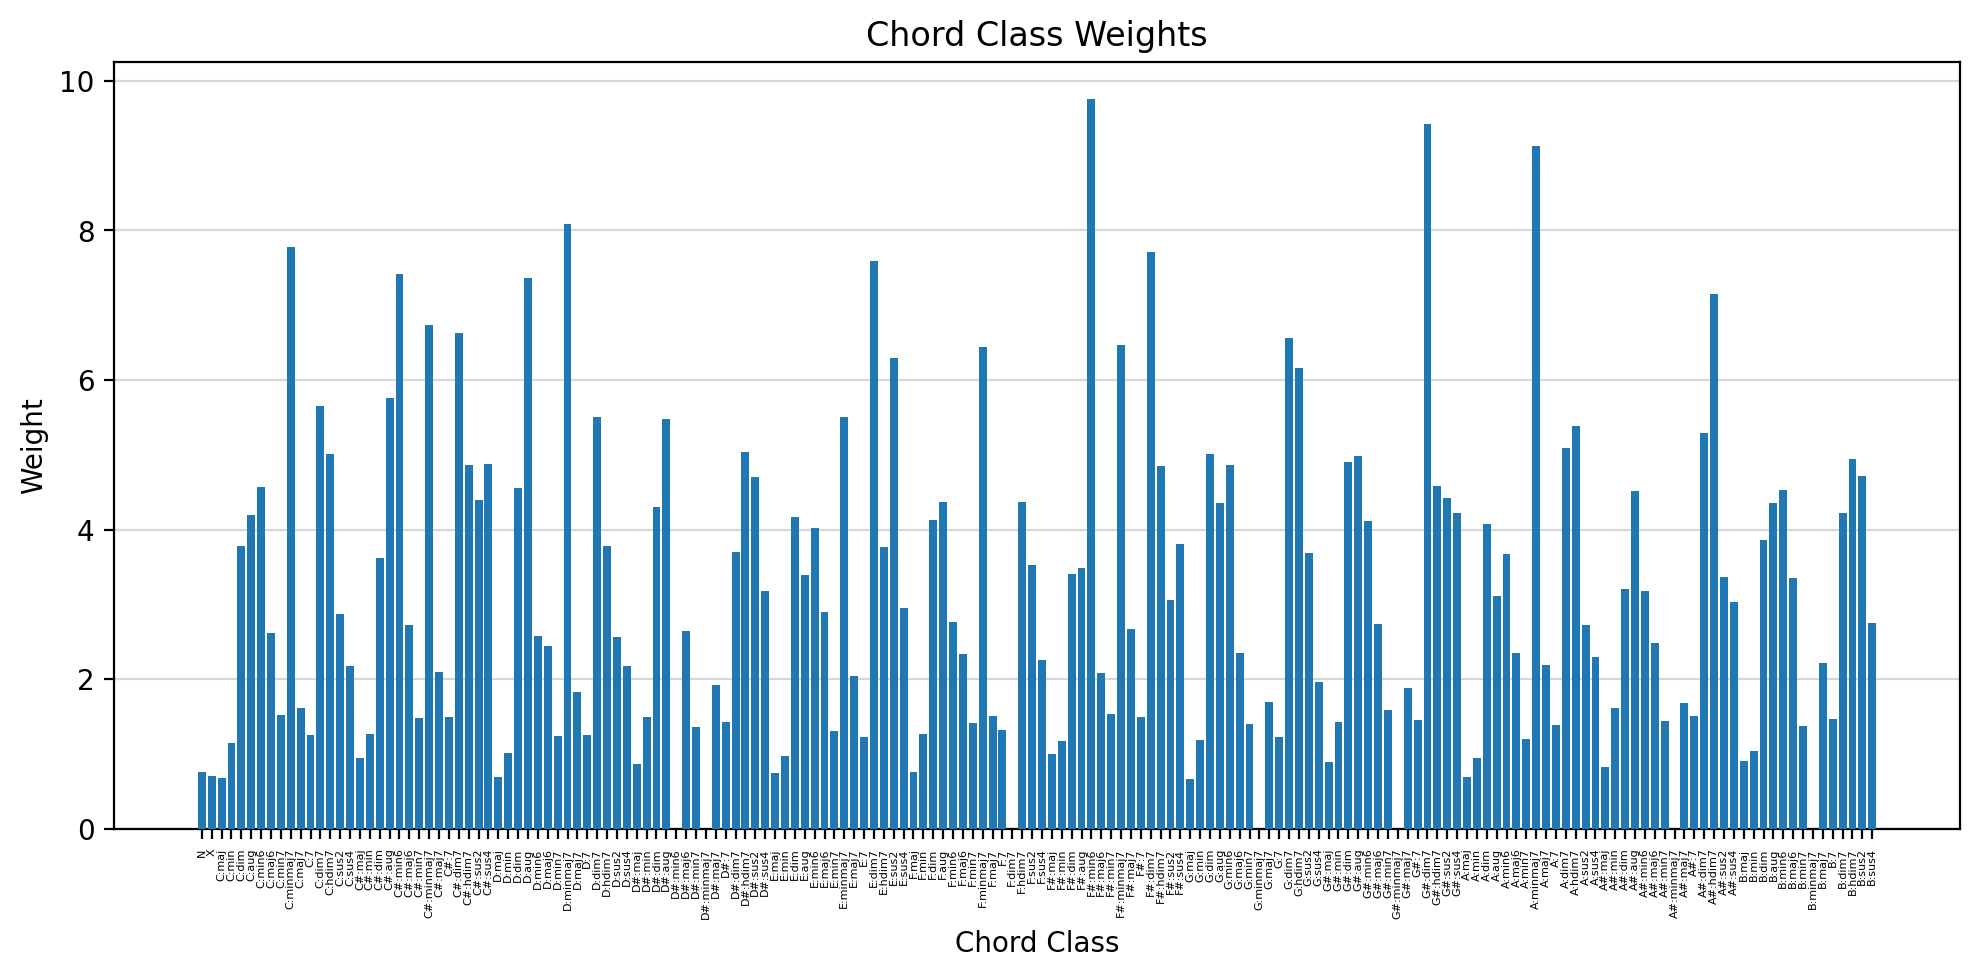

In [60]:
# Weights hist
plt.figure(figsize=(10, 5))
plt.grid(axis='y', alpha=0.5, zorder=-1)
plt.bar(range(len(weights)), weights, zorder=3, color='tab:blue')
plt.xlabel('Chord Class')
plt.ylabel('Weight')
plt.title('Chord Class Weights')
plt.xticks(range(len(weights)), [id_to_chord(c) for c in range(NUM_CHORDS)] , rotation=90, fontsize=4)
plt.tight_layout()
plt.savefig('./thesis/figures/class_weights.png', bbox_inches='tight')
plt.show()